In [2]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Acropolis'
raceDate = '7-10/9/2023'
surface = 'Gravel'
competition = 'Wrc'

link = 'https://www.ewrc-results.com/results/80243-eko-acropolis-rally-greece-2023/?s='
startat, no_ss=423312, int(1)

canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [11]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#69,Rovanperä Kall,RC1 M,1:32.9,-,57.4,1,Acropolis,7-10/9/2023,Gravel,Wrc,1
1,2,#4,Lappi Esapekka,RC1 M,1:33.2,+0.3 + 0.3,57.2 0.20,1,Acropolis,7-10/9/2023,Gravel,Wrc,2
2,3,#11,Neuville Thier,RC1 M,1:33.3,+0.4 + 0.1,57.1 0.27,1,Acropolis,7-10/9/2023,Gravel,Wrc,3
3,4,#6,Sordo Dani -,RC1 M,1:33.4,+0.5 + 0.1,57.0 0.34,1,Acropolis,7-10/9/2023,Gravel,Wrc,4
4,5,#8,Tänak Ott - J,RC1 M,1:33.6,+0.7 + 0.2,56.9 0.47,1,Acropolis,7-10/9/2023,Gravel,Wrc,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61,#55,Galerakis Spir,RC3,1:56.5,+23.6 + 1.8,45.7 16.0,1,Acropolis,7-10/9/2023,Gravel,Wrc,61
61,62,#80,Kalamaras Teo,RC4,2:00.4,+27.5 + 3.9,44.3 18.6,1,Acropolis,7-10/9/2023,Gravel,Wrc,62
62,63,#51,Vassilakis Geo,RC2,2:01.8,+28.9 + 1.4,43.7 19.5,1,Acropolis,7-10/9/2023,Gravel,Wrc,63
63,64,#81,Panteli C. -,RC4,2:04.3,+31.4 + 2.5,42.9 21.2,1,Acropolis,7-10/9/2023,Gravel,Wrc,64


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Rovanperä Kall,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,1,92.9
1,Lappi Esapekka,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,2,93.2
2,Neuville Thier,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,3,93.3
3,Sordo Dani -,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,4,93.4
4,Tänak Ott - J,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,5,93.6
...,...,...,...,...,...,...,...,...,...
60,Galerakis Spir,RC3,1,Acropolis,7-10/9/2023,Gravel,Wrc,61,116.5
61,Kalamaras Teo,RC4,1,Acropolis,7-10/9/2023,Gravel,Wrc,62,120.4
62,Vassilakis Geo,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,63,121.8
63,Panteli C. -,RC4,1,Acropolis,7-10/9/2023,Gravel,Wrc,64,124.3


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

,,min_time
Race,ss,
Acropolis,1,92.9


In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Rovanperä Kall,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,1,92.9,92.9,0.0,0.000000,01
1,Lappi Esapekka,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,2,93.2,92.9,0.3,0.322928,01
2,Neuville Thier,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,3,93.3,92.9,0.4,0.430571,01
3,Sordo Dani -,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,4,93.4,92.9,0.5,0.538213,01
4,Tänak Ott - J,RC1 M,1,Acropolis,7-10/9/2023,Gravel,Wrc,5,93.6,92.9,0.7,0.753498,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Galerakis Spir,RC3,1,Acropolis,7-10/9/2023,Gravel,Wrc,61,116.5,92.9,23.6,25.403660,01
61,Kalamaras Teo,RC4,1,Acropolis,7-10/9/2023,Gravel,Wrc,62,120.4,92.9,27.5,29.601722,01
62,Vassilakis Geo,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,63,121.8,92.9,28.9,31.108719,01
63,Panteli C. -,RC4,1,Acropolis,7-10/9/2023,Gravel,Wrc,64,124.3,92.9,31.4,33.799785,01


In [13]:
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('RC2')]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
8,Mikkelsen Andr,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,9,95.0,92.9,2.1,2.260495,01
9,Gryazin Nikola,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,10,95.4,92.9,2.5,2.691066,01
10,Bulacia Marco,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,11,95.7,92.9,2.8,3.013994,01
12,Fourmaux Adrie,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,13,96.0,92.9,3.1,3.336921,01
13,Rossel Yohan,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,14,96.1,92.9,3.2,3.444564,01
14,Kajetanowicz K,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,15,96.1,92.9,3.2,3.444564,01
15,Solberg Oliver,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,16,96.6,92.9,3.7,3.982777,01
16,Joona Lauri -,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,17,96.7,92.9,3.8,4.090420,01
17,Greensmith Gus,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,18,96.9,92.9,4.0,4.305705,01
18,Munster Grégoi,RC2,1,Acropolis,7-10/9/2023,Gravel,Wrc,19,96.9,92.9,4.0,4.305705,01


In [14]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race,Acropolis
SS.,01
Crew,
Athanassoulas,7.9
Bulacia Marco,2.8
Cachón Alejand,8.4
Campagnoli Gab,17.4
Cărăgui Eugen,12.9
Dolofan Cristi,15.7
Díaz-Aboitiz M,14.9
Fourmaux Adrie,3.1


Text(0.5, 1.0, 'Acropolis\nDiference between C6 Participants and Stage winer (sec)')

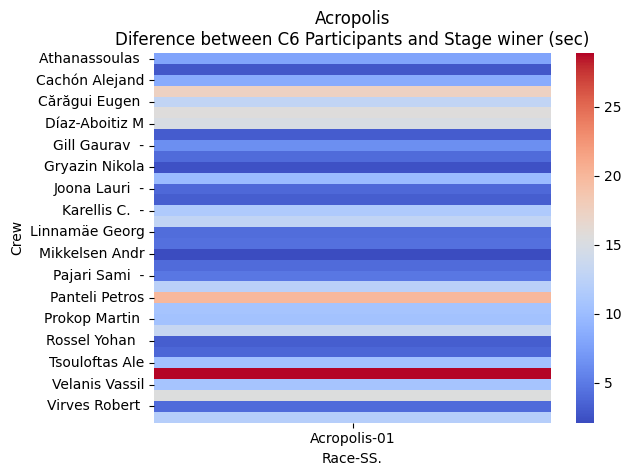

In [15]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
#plt.savefig((rallyname) + "Heatmap_C1.png")

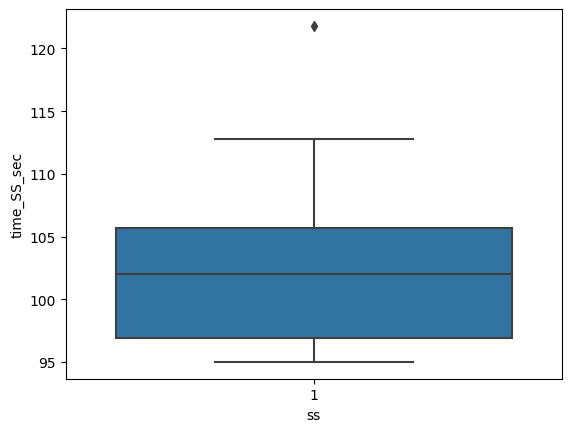

In [16]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

Text(0.5, 1.0, 'Acropolis\nDiference between C1 Participants and Stage winer (%)')

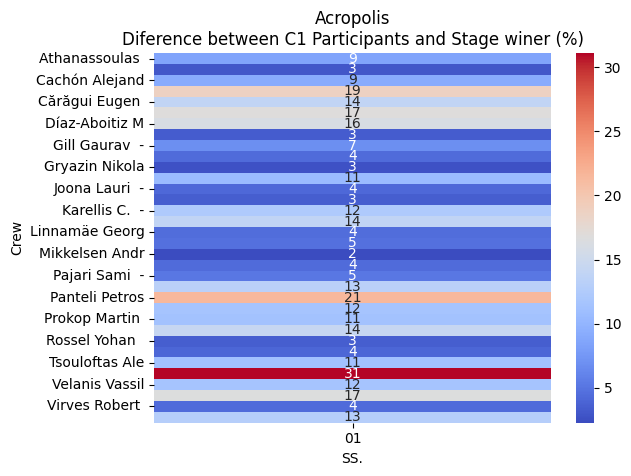

In [17]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
#plt.savefig(rallyname + "C1.jpg")